In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os 

# Reading all the images in a python list

In [13]:
img_arr=[]
for i in range(1,151):
    img_path = os.path.join('E:\python\python_projects\deepfaceTensorflow\DeepLearning\CNN\datasets\cifar10\\'+str(i)+'.png')
    img=np.array(Image.open(img_path))/255.
    img_arr.append(img)

#converting back to numpy array
img_arr=np.array(img_arr)
img_arr.shape

(150, 32, 32, 3)

# we have used 150 images and stored 32x32x3 dimensional images to a numpy array, we can add noise to each of these images 

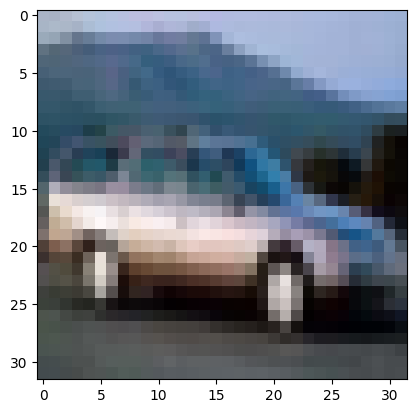

In [14]:
plt.imshow(img_arr[4])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


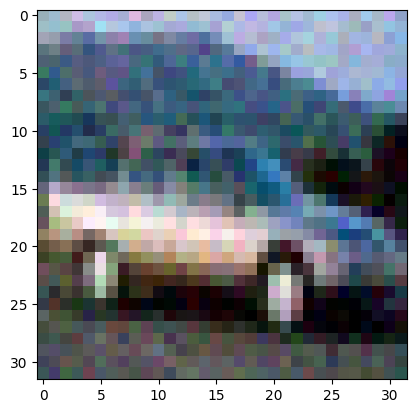

In [15]:
# adding random noise to the images 
noise_factor=0.05
noisy_img = img_arr + noise_factor * np.random.normal(size=img.shape)
# print(img)
plt.imshow(noisy_img[4])
plt.show()

# test the same and create model and see the result

In [16]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

# auto-encoder having 2 downsampling layers in encoding with filters 32 and 64, followed by a final layer with 128 filters
# decoding we have 128 and 64 filters in the first 2 upsampling layers followed by a final softmax layer with 2 nodes (representing each color channel)

In [17]:
def auto_encoder(img):
    #Eoncoder module 
    fsize =3 #filter size
    psize = 1 # pool size 
    conv1=Conv2D(32, (fsize,psize),activation='relu',padding='same')(img)
    pool1=MaxPooling2D(pool_size=(psize,psize))(conv1)
    conv2=Conv2D(64,(fsize,psize),activation='relu',padding='same')(pool1)
    pool2=MaxPooling2D(pool_size=(psize,psize))(conv2)
    conv3=Conv2D(128,(fsize,fsize),activation='relu',padding='same')(pool2)

    #decode module
    conv4=Conv2D(128, (fsize,psize),activation='relu',padding='same')(img)
    up4=UpSampling2D((psize,psize))(conv4)
    conv5=Conv2D(64,(fsize,psize),activation='relu',padding='same')(up4)
    up5=UpSampling2D((psize,psize))(conv5)
    decode=Conv2D(3,(fsize,fsize),activation='relu',padding='same')(up5)
    return decode

In [18]:
img = Input(shape=(32,32,3))
model=Model(img, auto_encoder(img))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(noisy_img[:120],img_arr[:120],epochs=10,validation_split=0.2)

Epoch 1/10
3/3 [==============================] - 9s 161ms/step - loss: 0.1332 - val_loss: 0.0547
Epoch 2/10
3/3 [==============================] - 0s 19ms/step - loss: 0.0317 - val_loss: 0.0428
Epoch 3/10
3/3 [==============================] - 0s 19ms/step - loss: 0.0432 - val_loss: 0.0352
Epoch 4/10
3/3 [==============================] - 0s 19ms/step - loss: 0.0257 - val_loss: 0.0209
Epoch 5/10
3/3 [==============================] - 0s 20ms/step - loss: 0.0202 - val_loss: 0.0265
Epoch 6/10
3/3 [==============================] - 0s 19ms/step - loss: 0.0229 - val_loss: 0.0251
Epoch 7/10
3/3 [==============================] - 0s 18ms/step - loss: 0.0193 - val_loss: 0.0185
Epoch 8/10
3/3 [==============================] - 0s 19ms/step - loss: 0.0149 - val_loss: 0.0161
Epoch 9/10
3/3 [==============================] - 0s 18ms/step - loss: 0.0144 - val_loss: 0.0144
Epoch 10/10
3/3 [==============================] - 0s 18ms/step - loss: 0.0124 - val_loss: 0.0113


# prediction on training and testing data

5/5 [==============================] - 0s 35ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


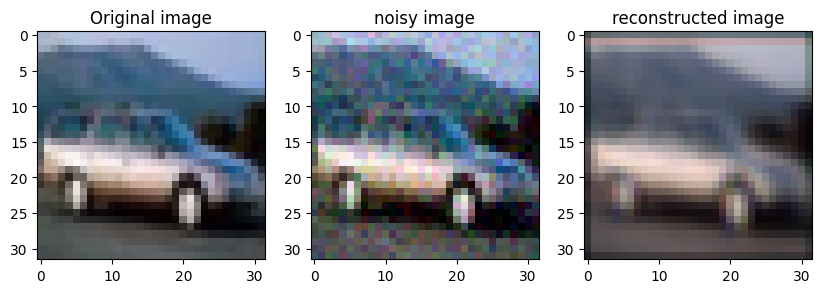

In [23]:
pred = model.predict(img_arr)

#training data
plt.figure(figsize=(10,5))

ax1=plt.subplot2grid((1,3),(0,0))
ax1.set_title('Original image')
ax1.imshow(img_arr[4])

ax1=plt.subplot2grid((1,3),(0,1))
ax1.set_title('noisy image')
ax1.imshow(noisy_img[4])

ax1=plt.subplot2grid((1,3),(0,2))
ax1.set_title('reconstructed image')
ax1.imshow(pred[4])
plt.show()

# test data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


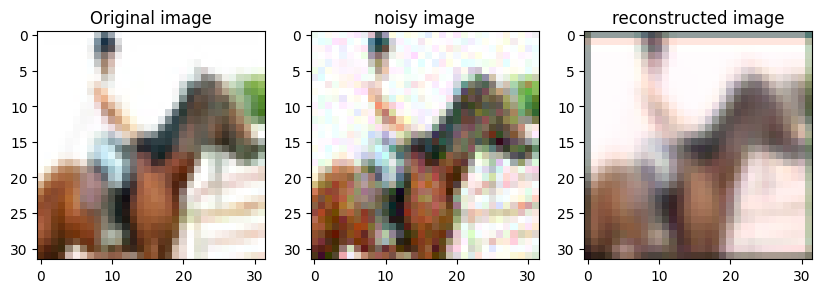

In [24]:
plt.figure(figsize=(10,5))

ax1=plt.subplot2grid((1,3),(0,0))
ax1.set_title('Original image')
ax1.imshow(img_arr[131])

ax1=plt.subplot2grid((1,3),(0,1))
ax1.set_title('noisy image')
ax1.imshow(noisy_img[131])

ax1=plt.subplot2grid((1,3),(0,2))
ax1.set_title('reconstructed image')
ax1.imshow(pred[131])
plt.show()